# Iris Flower Classification

This notebook outlines a complete, technical roadmap for building an Iris flower classification solution—from data acquisition and exploration to advanced model tuning and deployment. It covers all the learning objectives below:

1. **Data Acquisition & Understanding**
   - Download the Iris dataset
   - Examine dataset structure, data types, and summary statistics

2. **Data Preprocessing**
   - Handle missing values and duplicates
   - Normalize/scale numerical features
   - Encode target labels

3. **Exploratory Data Analysis (EDA)**
   - **Univariate Analysis:** Histograms, boxplots, and summary statistics
   - **Bivariate Analysis:** Scatter plots, correlation matrices, cross-tabulations
   - **Multivariate Analysis:** Pair plots, heatmaps, and PCA for visualization
   - Identify outliers and assess distributions

4. **Feature Engineering**
   - Derive new features if beneficial
   - Apply feature selection methods

5. **Model Selection & Implementation**
   - Implement multiple classification algorithms (e.g., Logistic Regression, SVM, KNN, Decision Trees, Random Forests, Naive Bayes, Ensemble Methods)
   - Understand algorithm assumptions and math
   - Train models using cross-validation or a hold-out method

6. **Model Evaluation**
   - Calculate accuracy, precision, recall, F1-score, and confusion matrix
   - Perform error analysis and compare models

7. **Hyperparameter Tuning & Optimization**
   - Use Grid Search or Randomized Search
   - Analyze bias–variance trade-offs

8. **Advanced Topics (Optional)**
   - Explore ensemble/boosting methods
   - Apply advanced dimensionality reduction techniques (e.g., t-SNE, UMAP)
   - Learn model deployment techniques (saving/loading models)

9. **Project Documentation & Reproducibility**
   - Document steps, code, and results
   - Create comprehensive reports and visualizations

Let's get started!

## 1. Data Acquisition & Understanding

We load the Iris dataset directly from scikit-learn. The dataset contains 150 samples, 4 features (sepal length, sepal width, petal length, petal width) and 3 target classes.

In [14]:
from sklearn import datasets
import pandas as pd
import numpy as np

# Load Iris dataset
iris = datasets.load_iris()

# Create a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Map numerical target to species names
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display first few rows
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
109,7.2,3.6,6.1,2.5,2,virginica
54,6.5,2.8,4.6,1.5,1,versicolor
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
118,7.7,2.6,6.9,2.3,2,virginica


### Data Summary

Let's check the dataset structure, data types, and summary statistics.

In [16]:
# Check structure and data types
df.info()

# Summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## 2. Data Preprocessing

We now handle missing values (if any), duplicates, scale numerical features, and encode target labels. (In the Iris dataset there are no missing values, but we include these steps for completeness.)

In [17]:
# Check for missing values and duplicates
print("Missing values per column:\n", df.isnull().sum())
print("\nNumber of duplicate rows:", df.duplicated().sum())

#drop duplicates 
df.drop_duplicates(inplace=True)


Missing values per column:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

Number of duplicate rows: 1


In [18]:
df.columns.to_list()

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'target',
 'species']

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# Feature Scaling Techniques

There are different types of **feature scaling techniques**, and while **Standard Scaler** (Standardization) is one of them, there are other methods that might be more suitable depending on your dataset.

First Lets talk about Standard deviation: tells how dispersed the data is. Variance (information) = σ<sup>2</sup>
1. Population Standard Deviation (σ)

If you are calculating standard deviation for an entire population:  
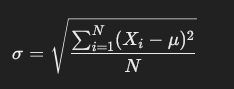
​

Where:

- X<sub>i</sub>​ = each data point
- μ = population mean
- N = total number of data points

2. Sample Standard Deviation (S)

If you are working with a sample (instead of the entire population), use N−1 (Bessel’s correction) instead of N:  
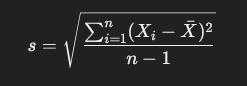  
​
Where:
- X<sub>i</sub>​ = each data point
- $\bar{X}$ = sample mean
- n-1 = total number of sample data points

The key difference is dividing by N−1 instead of N to correct for bias in estimating the population standard deviation from a sample.

Methods of scaling:

1. StandardScaler (Standardization)

    Formula:
    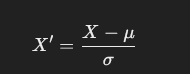  
    Effect: Centers data around zero with unit variance.  
    Best for: Normally distributed data.  
    Example: sklearn.preprocessing.StandardScaler()  
2. MinMaxScaler (Normalization)

    Formula:
    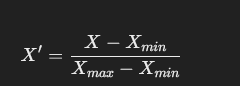  
    Effect: Scales data to a fixed range (usually [0,1]).  
    Best for: When you need to preserve zero-centered data without distorting relationships.  
    Example: sklearn.preprocessing.MinMaxScaler()  
3. RobustScaler

    Formula:
    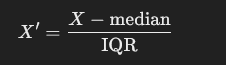  
    Effect: Uses median and interquartile range (IQR) to scale, making it robust to outliers.  
    Best for: Data with many outliers.  
    Example: sklearn.preprocessing.RobustScaler()  
4. MaxAbsScaler

    Formula:
    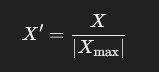  
    Effect: Scales values between -1 and 1 while preserving sparsity.  
    Best for: Data that contains both positive and negative values.  
    Example: sklearn.preprocessing.MaxAbsScaler()  
5. Power Transformer (Yeo-Johnson & Box-Cox)  
    Effect: Makes data more Gaussian-like (useful for skewed distributions).  
    Best for: Data that is highly skewed or non-normal.  
    Example: sklearn.preprocessing.PowerTransformer()  

| Scaler Type       | Handles Outliers? | Keeps Gaussian Shape? | Normalization Range |
|-------------------|------------------|----------------------|--------------------|
| **StandardScaler** | No               | Yes                  | No fixed range    |
| **MinMaxScaler**  | No               | No                   | [0,1] (or custom) |
| **RobustScaler**  | Yes              | No                   | No fixed range    |
| **MaxAbsScaler**  | No               | No                   | [-1,1]            |
| **PowerTransformer** | Somewhat        | Yes                  | No fixed range    |



In [19]:

# For demonstrationa, if any missing values existed, you could fill them:
# df.fillna(method='ffill', inplace=True)

# Normalize numerical features using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
feature_cols = iris.feature_names
df[feature_cols] = scaler.fit_transform(df[feature_cols])

# Encode target labels (already numeric, but ensure consistency)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target_encoded'] = le.fit_transform(df['species'])

df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species,target_encoded
70,0.068082,0.322549,0.596536,0.796477,1,versicolor,1
111,0.671904,-0.827206,0.880329,0.928046,2,virginica,2
90,-0.414976,-1.057157,0.369502,0.007064,1,versicolor,1
66,-0.294211,-0.137353,0.426261,0.401770,1,versicolor,1
132,0.671904,-0.597255,1.050605,1.322752,2,virginica,2


## 3. Exploratory Data Analysis (EDA)

### Univariate Analysis

We will visualize the distribution of each numerical feature using histograms and boxplots, and compute summary statistics.

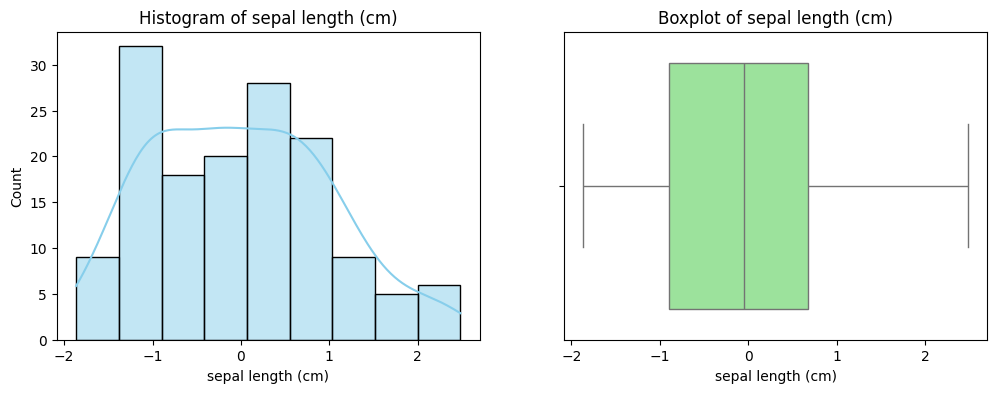

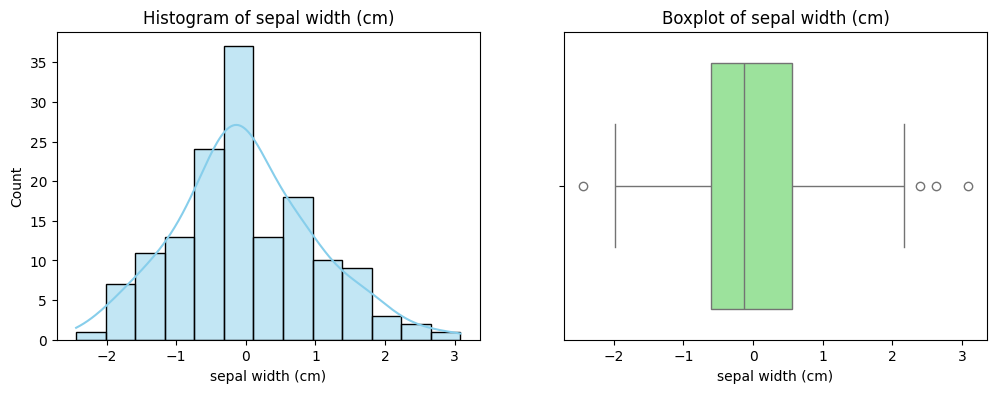

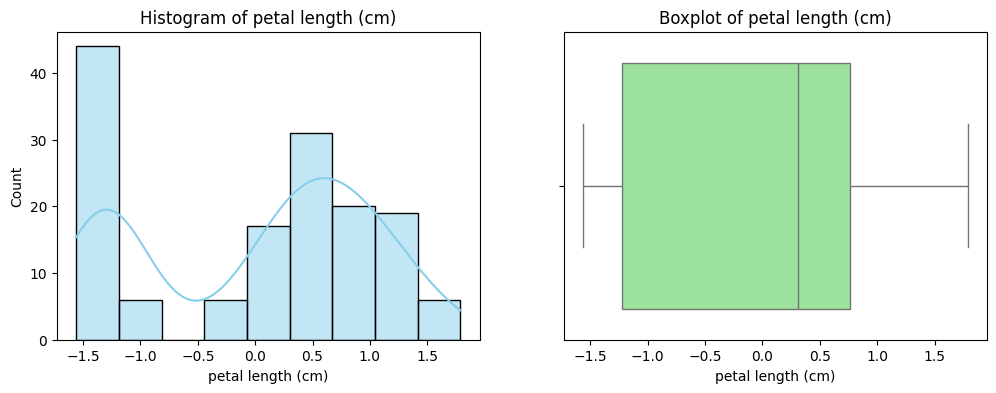

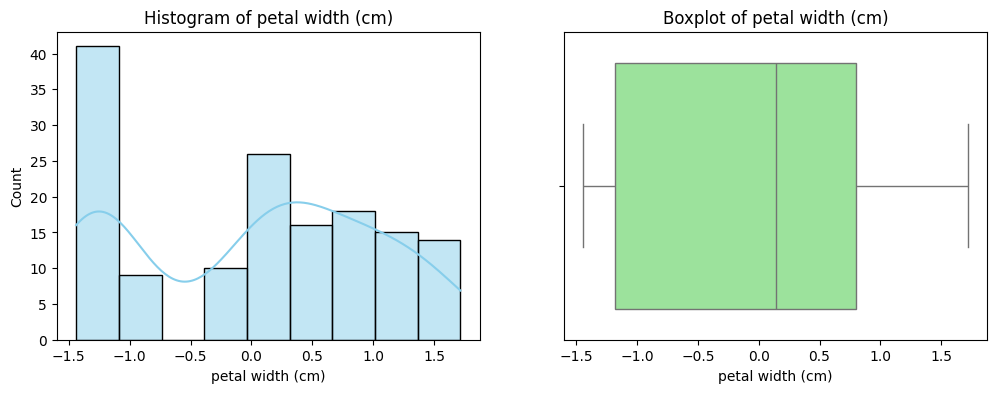

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count       1.490000e+02      1.490000e+02       1.490000e+02   
mean       -2.193622e-15     -1.907497e-15      -1.525998e-15   
std         1.003373e+00      1.003373e+00       1.003373e+00   
min        -1.864149e+00     -2.436862e+00      -1.560289e+00   
25%        -8.980334e-01     -5.972549e-01      -1.219738e+00   
50%        -5.268246e-02     -1.373532e-01       3.127435e-01   
75%         6.719041e-01      5.524994e-01       7.668121e-01   
max         2.483370e+00      3.081959e+00       1.788466e+00   

       petal width (cm)  
count      1.490000e+02  
mean      -9.537486e-16  
std        1.003373e+00  
min       -1.440192e+00  
25%       -1.177055e+00  
50%        1.386329e-01  
75%        7.964768e-01  
max        1.717458e+00  


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot histograms and boxplots for each feature
for col in feature_cols:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.show()

# Print summary statistics
print(df[feature_cols].describe())

### Bivariate Analysis

Next, we explore relationships between features and the target using scatter plots and a correlation matrix.

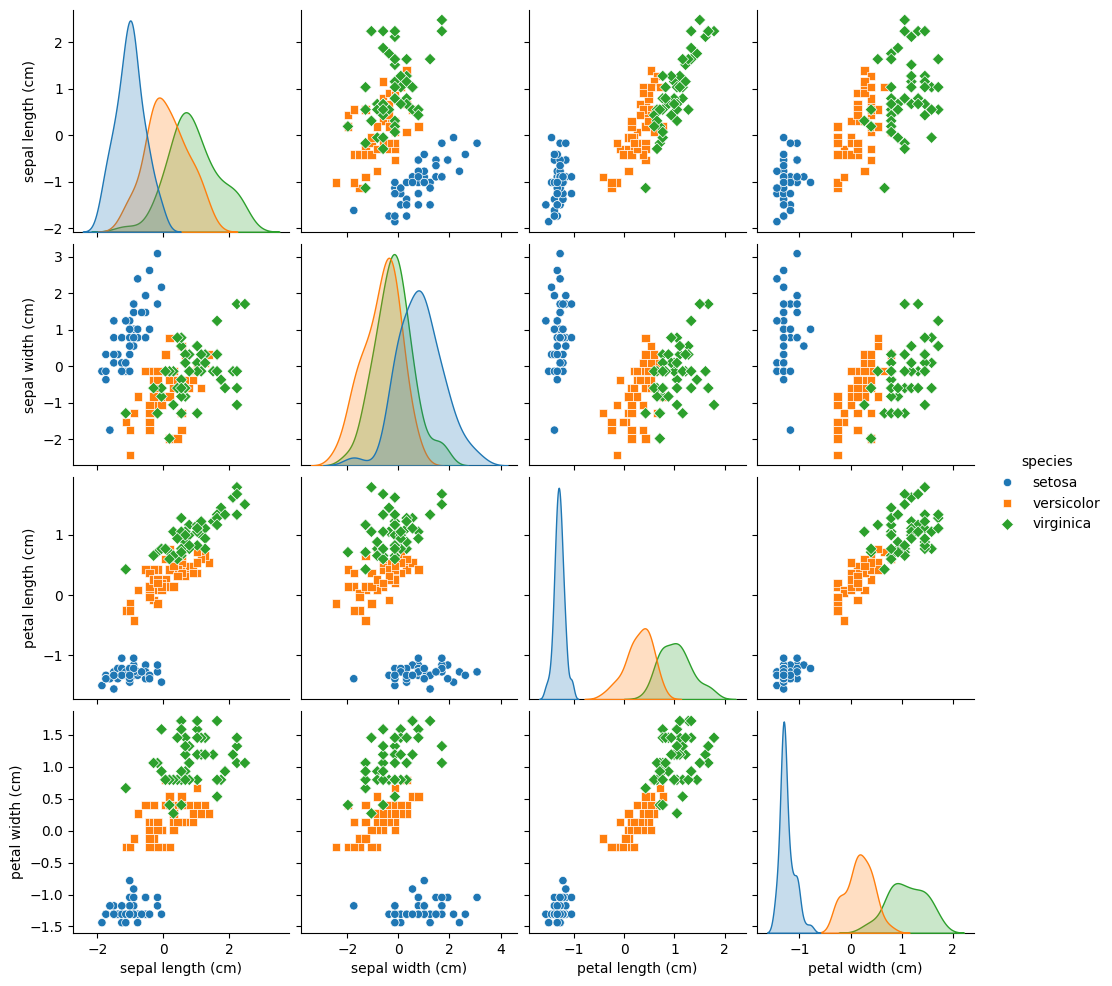

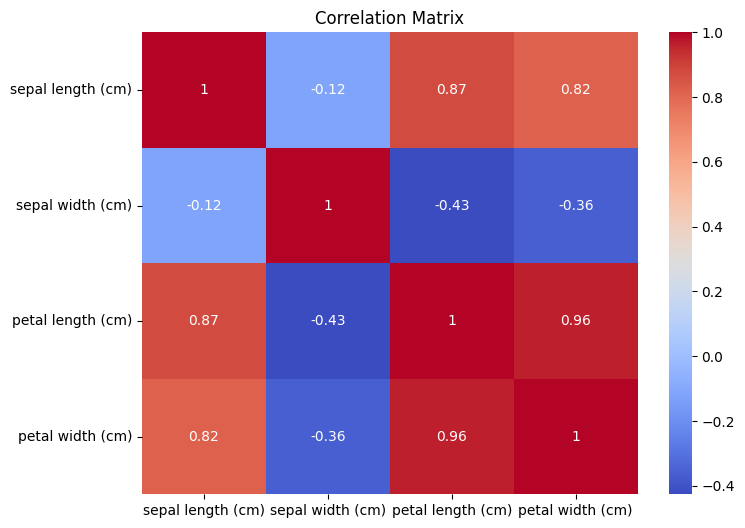

In [21]:
# Scatter plot for each pair of features colored by species
sns.pairplot(df, vars=feature_cols, hue='species', markers=['o', 's', 'D'])
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(8,6))
corr = df[feature_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Observation:

✅ Feature Selection:  
    
    Scatter: 
        Petal length and petal width are highly discriminative. Focus on these features for classification.
        Sepal width is less useful due to heavy overlap. 
    Correlation matrix:
        Petal Length and Petal Width are highly correlated (0.96) keeping both might introduce redundancy. We could remove one of them to reduce multicollinearity.
        Sepal Width has weak correlations, so it might not contribute much to PCA or model performance.

✅ Dimensionality Reduction:  
    
    Since features are correlated, Principal Component Analysis (PCA) can reduce redundancy and improve classification.

✅ Check for Overfitting in Models:

    If using models like Linear Regression or Logistic Regression, we should be cautious about multicollinearity, which can make models unstable.

### Multivariate Analysis

Lets skip for now

### PCA

We use PCA to visualize the data in two dimensions.

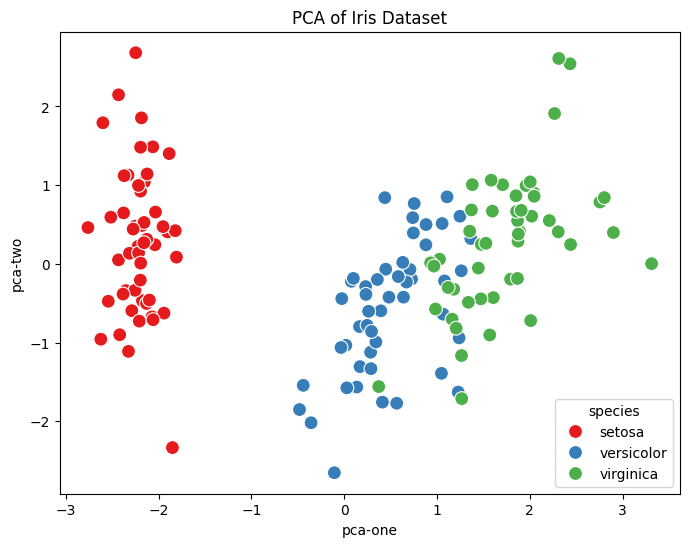

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[feature_cols])

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(x='pca-one', y='pca-two', hue='species', data=df, palette='Set1', s=100)
plt.title('PCA of Iris Dataset')
plt.show()

✅ Classification Strategy:

    Since Setosa is well-separated, a simple model like Logistic Regression can classify it perfectly.
    For Versicolor and Virginica, a non-linear model like SVM with RBF kernel or a Decision Tree may work better.

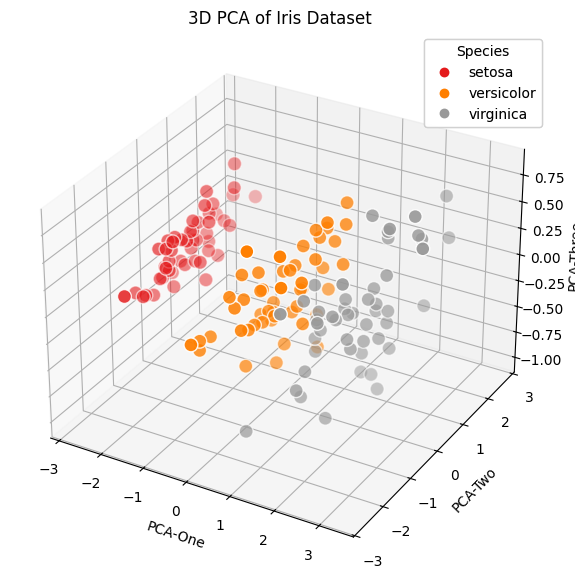

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Perform PCA with 3 components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feature_cols])

# Store PCA results in DataFrame
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]
df['pca-three'] = pca_result[:,2]

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(df['pca-one'], df['pca-two'], df['pca-three'], 
                     c=df['species'].astype('category').cat.codes, 
                     cmap='Set1', s=100, edgecolors='w')

# Labels and Title
ax.set_xlabel("PCA-One")
ax.set_ylabel("PCA-Two")
ax.set_zlabel("PCA-Three")
ax.set_title("3D PCA of Iris Dataset")

# Legend
legend_labels = {i: species for i, species in enumerate(df['species'].unique())}
legend = ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels.values(), title="Species")
ax.add_artist(legend)

# Show plot
plt.show()


## 4. Feature Engineering

For this classic dataset, features are already informative. However, as an example, we can create a new feature (e.g., petal area) and also use feature selection techniques.

In [24]:
# Create a new feature: Petal Area = petal length * petal width
df['petal_area'] = df['petal length (cm)'] * df['petal width (cm)']

print(df[['petal length (cm)', 'petal width (cm)', 'petal_area']].head())

# (Optional) Feature selection example using correlation threshold
threshold = 0.95
corr_matrix = df[feature_cols + ['petal_area']].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print("Features to drop due to high correlation:", to_drop)

   petal length (cm)  petal width (cm)  petal_area
0          -1.333255         -1.308624    1.744729
1          -1.333255         -1.308624    1.744729
2          -1.390014         -1.308624    1.819005
3          -1.276496         -1.308624    1.670454
4          -1.333255         -1.308624    1.744729
Features to drop due to high correlation: ['petal width (cm)']


### Implementing Multiple Models


#### 1.  Logistic Regression:   
https://www.youtube.com/watch?v=YMJtsYIp4kg  
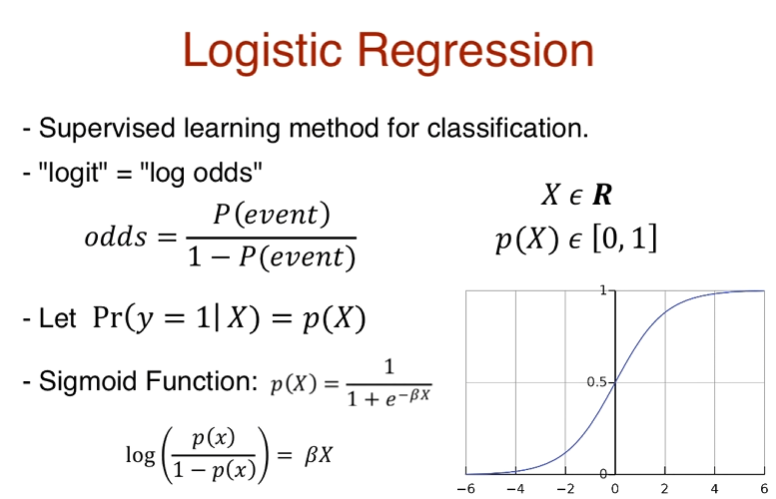


- Linear Model (Like Linear Regression)

    In logistic regression, we start with a linear equation:  
    z=β0+β1X1+β2X2+...+βnXn  
    z=β0​+β1​X1​+β2​X2​+...+βn​Xn​
- Since we need a probability (value between 0 and 1), we apply the sigmoid function:  
    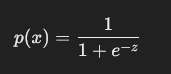  
    its bounded between 0 and 1

- Odds and Log-Odds (Logit Function)

    We can rewrite the probability using odds and log-odds (logit transformation):

    - Odds: The ratio of success to failure:  
        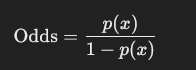
    

    - Log-Odds: Taking the natural log of the odds gives (this makes the relationship Linear again since exponential and log are inverse):  
        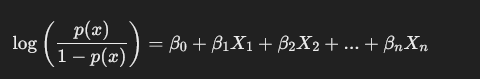  
        This transformation maps probabilities from (0,1) to (−∞,+∞), allowing the use of a linear model.

    
    This means logistic regression models the log-odds as a linear function of input variables.

- Since logistic regression is not solved using least squares (like linear regression), we use Maximum Likelihood Estimation (MLE) to find the best parameters β.  
    Likelihood Function:  
    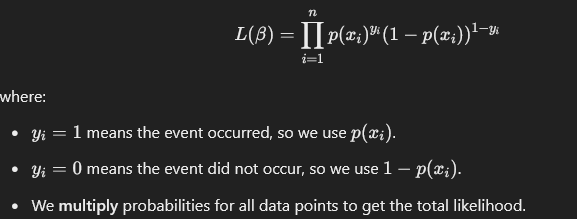
    

- Take the Log of the Likelihood (Log-Likelihood Function)

    Since multiplying many small probabilities can lead to numerical issues, we take the natural logarithm to convert it into a sum:  
    Cost Function:   
    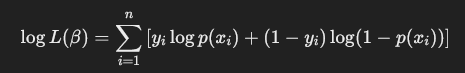  
    This function is called the log-likelihood function, and our goal is to maximize it.

- Find the Best Parameters (β)
    To maximize the log-likelihood function, we take the derivative with respect to β and set it to zero:  
    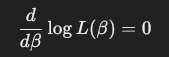

- Prediction Process in Logistic Regression

    When making predictions, the model first calculates the log-odds:  
    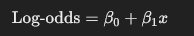

    Then, it converts log-odds into probability using the sigmoid function:  
    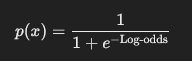

    This gives a probability between 0 and 1.

    However, there is no closed-form solution (like in linear regression), so we use optimization algorithms to find the best β values like:
    - Gradient Descent
    - Newton-Raphson  
    


#### 2. SVM
https://www.youtube.com/watch?v=ny1iZ5A8ilA&ab_channel=IntuitiveMachineLearning  
A.K.A maximum Margin Classifier.  
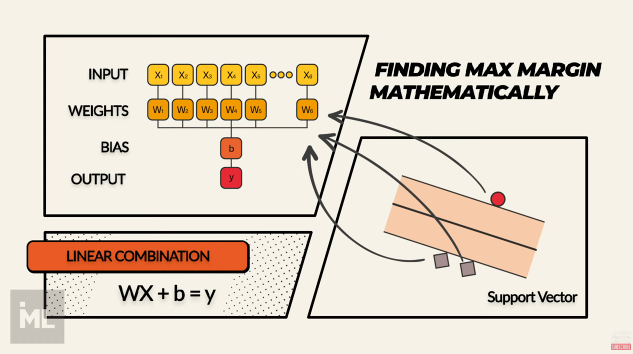  
1. Support Vector Machine (SVM) is a supervised learning algorithm used mainly for classification (and sometimes regression). Its central goal is to find the best decision boundary (hyperplane) that separates data points of different classes.

Basic Terminology:  

- Hyperplane: In a 2D space, a hyperplane is simply a line, 1D a point and 3D a plane; in higher dimensions, it is a subspace that divides the data.
- Margin: The distance between the hyperplane and the closest data points from each class. in SVM only the data points closest (these points are support vector) to the Margin influence the final decision boundary.
- Support Vectors: These are the data points that lie closest to the hyperplane. They are critical because they determine the hyperplane’s position and orientation.

2. Linear SVM for Separable Data
    1. Define the Hyperplane:

        The hyperplane is defined by the equation:  
        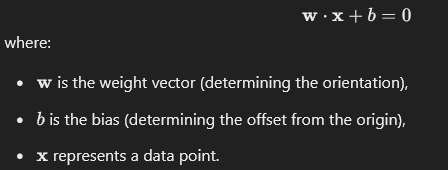  
        Here:
        - If w.x+b > 0 → The point is on one side of the margin.
        - If  w.x+b < 0 → The point is on the other side.
        - If  w.x+b = 0 → The point lies exactly on the margin.
    2. Maximizing the Margin  
    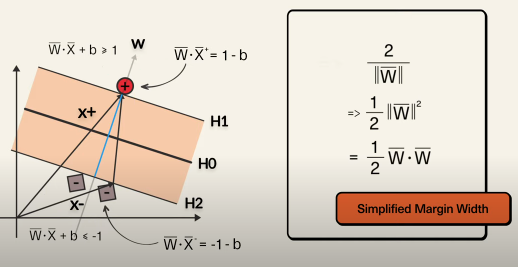 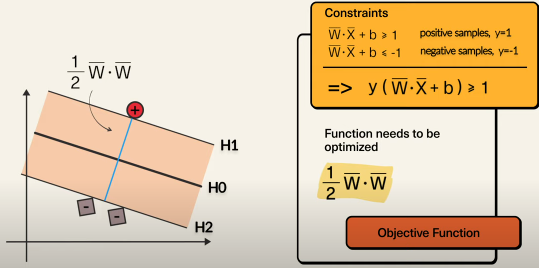

    - Margin: The distance from the hyperplane to the nearest points in each class  (H1 and H2) and Margin width M = 2/∥w∥. 
    - Goal: Maximize this margin, because a larger margin generally leads to better generalization.
    - The constraints for correct classification (assuming classes labeled as +1 and −1) are:  
    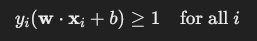
    - Optimization Objective: Minimize 1/2*∥w∥<sup>2</sup> (which is equivalent to maximizing the margin) while satisfying the above constraints.

3. Optimization via Lagrange Multipliers  
    Because we have constraints (constraints: each data point must be correctly classified), we use Lagrange multipliers (Always with the constraint) to solve the optimization problem.

    1. The Primal Problem:
        We want to minimize:  
        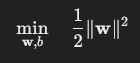  
        subject to:  
        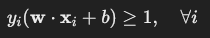
    2. Introducing Lagrange Multipliers
        - We form the Lagrangian:  
        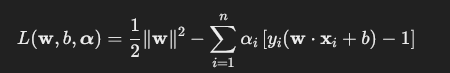  
        
        - where:
            -  α<sub>i</sub>≥0 : are the Lagrange multipliers. These are optimization variables, They determine the contribution of each training sample in defining the decision boundary. Only support vectors have non-zero α<sub>i</sub>​.
            - n: The sum runs over all n training points.
            - yi​,yj : ​ (Class labels of training samples), yi​ is the class label of the ith training sample. It takes values +1 or −1 for binary classification.
            - K(xi​,xj​): Kernel function applied to feature vectors xi​,xj​. This function replaces the dot product xi​⋅xj​ to map data into a higher-dimensional space.
                Common kernel functions:  
                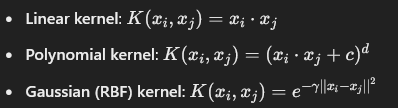


        - The idea is to find the saddle point of this Lagrangian—minimizing with respect to w and b and maximizing with respect to α.
        - we introduce variables called Lagrange multipliers to combine the objective function with the constraints into one single function.. For each constraint, you multiply it by a Lagrange multiplier and add (or subtract) that to the objective.
        - The Lagrangian function lets you “penalize” any violation of the constraints. Then you try to find the point where the overall function is optimized while satisfying the constraint
        
        
    3. Dual Formulation:
        - After setting up the Lagrangian, we can solve the optimization problem by first minimizing the Lagrangian with respect to the original variables (like the weights and bias in SVM) and then maximizing it with respect to the Lagrange multipliers.
        This process gives you the dual problem. The dual problem is expressed entirely in terms of the Lagrange multipliers.
        One key benefit is that, in the dual formulation, the data points appear only in the form of dot products. This is very useful because it allows the use of the kernel trick in SVMs, which helps in dealing with non-linear classification.
        In simple terms, instead of directly finding the best hyperplane in the original space, the dual formulation lets you work with the relationships (dot products) between the data points. This makes the optimization more flexible and computationally efficient, especially when data is high-dimensional.  
        - By taking derivatives of  with respect to w and b and setting them to zero, we derive the dual problem:  
            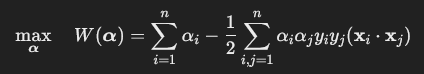  
            - yi​,yj : ​ (Class labels of training samples), yi​ is the class label of the ith training sample. It takes values +1 or −1 for binary classification.
        subject to:  
        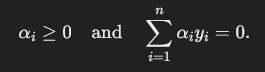  
        - Key Insight: `In the dual formulation`, the data appears only in the form of dot products (xi⋅xj). This becomes very important for introducing kernels.

    Overall, the Lagrangian turns a constrained problem into one that can be handled by optimizing a single function, and the dual formulation further refines this process, allowing SVMs to be extended to non-linear cases using kernel functions.

4.  Soft Margin   
    All the above calculation assumed that line is linearly separable or there are no outliers. When data is not perfectly separable—even in a transformed space—SVM introduces the concept of a soft margin to allow some misclassifications.  
    The parameter CC controls the trade-off between maximizing the margin and minimizing the classification error.  
    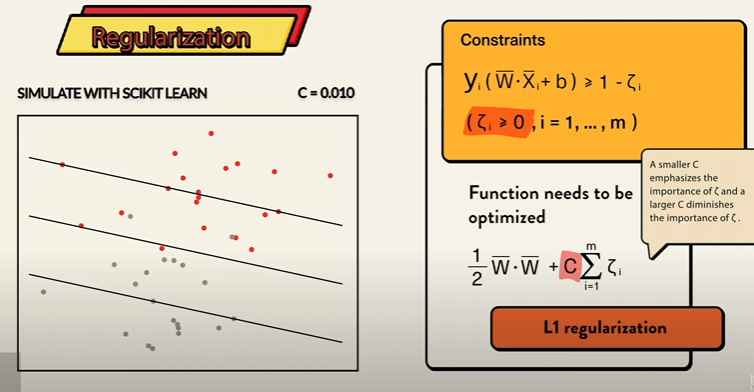  
    ζ or ξ<sub>i</sub> (eeta)-> slack variable, decides the width of the margin.  
    the optimization of SVM becomes:  
    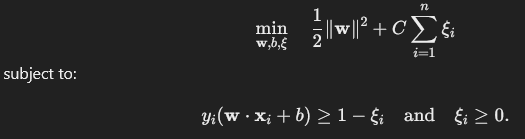

5. Handling Non-Linearly Separable Data: The Kernel Trick  
    Real-world data is often not perfectly separable by a straight line. The kernel trick addresses this by mapping data into a higher-dimensional space where a linear separator can exist.  
    The dual problem is only a function of x<sub>i</sub> and x<sub>j</sub>.  
    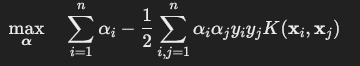

    Since the dual problem the magin only depends on the dot product of data points. So we can reshape the original space and still find a hyper plane as classifier.

    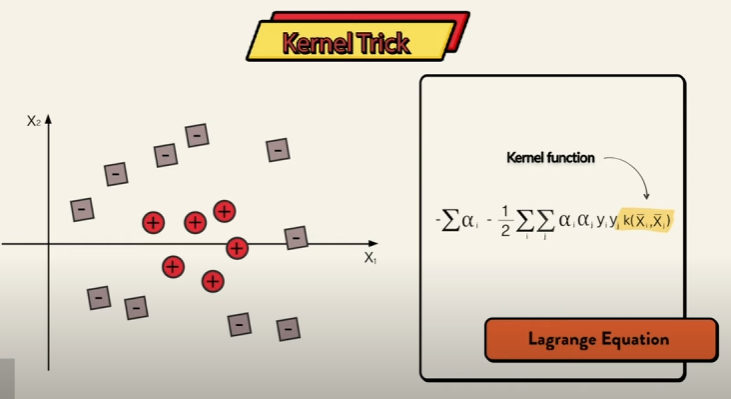 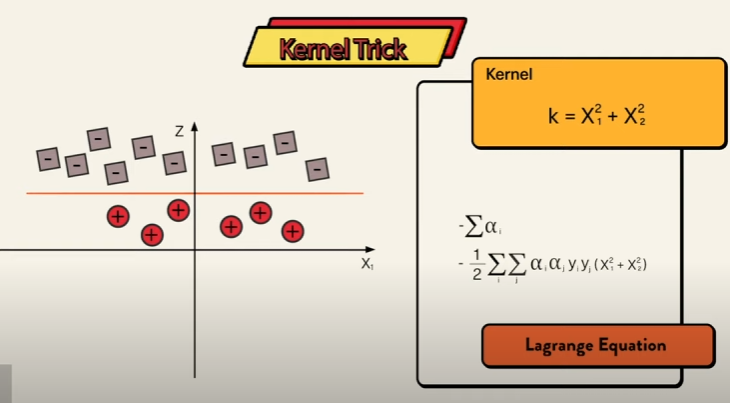

    Common Kernel Functions:  
    1. Linear Kernel  
        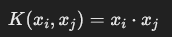  
        Parameters:  
        - No additional parameters  

        Effect:
        - Works well when data is already linearly separable
        - Fastest among kernels
        - Example use case: Text classification

    2. Polynomial Kernel  
        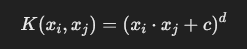  
        Parameters:
        - c → Bias term (controls flexibility)
        - d → Degree of polynomial (higher d makes complex decision boundaries)  

        Effect:
        - Can model complex, curved decision boundaries
        - Higher degree dd makes model more flexible but also prone to overfitting
        - Example use case: Image classification with structured patterns

    3. Gaussian Radial Basis Function (RBF) Kernel  
        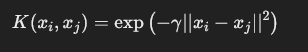  

        Parameters:  
        - γ (Gamma) → Defines how far influence of a training point reaches
            - High γ → Model focuses more on individual points (low bias, high variance)
            - Low γ → Model captures more global structure (high bias, low variance)  

        Effect:
        - Allows nonlinear decision boundaries
        - Works well when no prior assumption on data separation
        - Example use case: Handwritten digit recognition
    4. Sigmoid Kernel  
        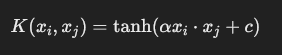  

        Parameters:
        - α → Scaling factor
        - c → Bias term

        Effect:
        - Similar to a neural network activation function
        - Sometimes unstable (depends on choice of α and c)
        - Example use case: Biological sequence analysis

    Comparison table:
    | **Kernel**   | **Best For**                   | **Parameters to Tune** | **Risk**                        |
    |-------------|--------------------------------|------------------------|--------------------------------|
    | Linear      | Linearly separable data        | None                   | Poor for complex data         |
    | Polynomial  | Structured patterns           |  c, d       | Overfitting with high  d |
    | RBF         | Complex, non-linear data      | γ         | Sensitive to γ     |
    | Sigmoid     | Neural network-like problems  |α  | Can be unstable               |

        

#### KNN
 
K-Nearest Neighbors (KNN) is one of the simplest machine learning algorithms, used for both classification and regression. It’s a non-parametric, instance-based method, which means it doesn't assume a specific underlying model and makes predictions based on the entire training dataset. 

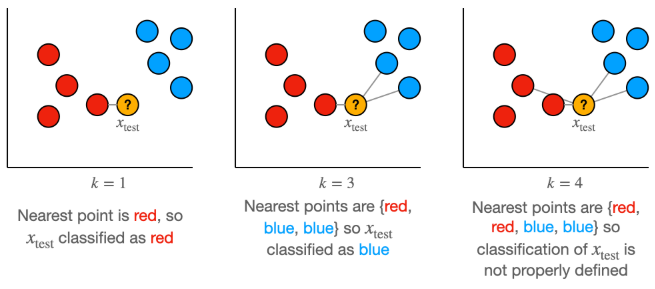  

1. Data Collection and Preprocessing  
- Preprocessing (Optional but Recommended):
    - Normalization/Standardization:
        Since KNN is distance-based (e.g., Euclidean distance), you need to ensure all features are on a similar scale.
    - Handling Missing Data:
        Remove or impute missing values as needed.

2. Choose the Value of K:  
    K represents the number of nearest neighbors you will consider to make a prediction.  
    Choosing K:
    - A small K (e.g., K = 1) can be noisy and sensitive to outliers.
    - A large K may smooth out the predictions too much, possibly ignoring local structure.
    - Common practice is to experiment with different values of K using cross-validation to find the best one.

3. Define the Distance Metric  
    KNN relies on a measure of similarity (or distance) between data points. Common choices include:

    Euclidean Distance (most common):  
        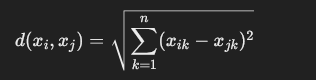
    

    Manhattan Distance:  
        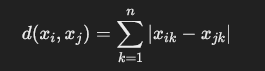
4. Compute the Distances  
    For a new, unlabeled data point (query point), compute its distance to every training example using the chosen distance metric.
5.  Identify the K Nearest Neighbors  
    1. Sort the Distances:  
        Once you have computed all distances, sort the training examples by their distance from the query point.
    2.  Top K:  
        Choose the K examples that are closest to the query.
6. Make a Prediction  
    - For Classification:

        - Voting:  
            Each of the K neighbors “votes” for its class label.  
            The query point is assigned the class that occurs most frequently among the neighbors.

            Example:  
                for example with K = 3:  
                    Two neighbors are “apple” and one is “orange.”   
                    Thus, result​ would be classified as an “apple.”

    - For Regression:
        - Averaging:
            The prediction is made by taking the average (or weighted average) of the neighbors’ target values.

7. Evaluate the Model

    After making predictions on the test set, you can evaluate the performance using appropriate metrics:

        For Classification: Accuracy, precision, recall, F1 score, etc.
        For Regression: Mean squared error (MSE), mean absolute error (MAE), etc.

Additional Considerations:   
- Distance Weighting:
    Sometimes, closer neighbors are more influential than farther ones. You can assign weights inversely proportional to the distance, so that nearer points have a higher impact on the prediction.

- Curse of Dimensionality:
    In high-dimensional spaces, the distance between points becomes less informative. Dimensionality reduction techniques (like PCA) might be necessary before applying KNN.

#### Decision Trees
A Decision Tree is a flowchart-like structure used for making decisions or predictions. It’s widely used in both classification and regression problems.  
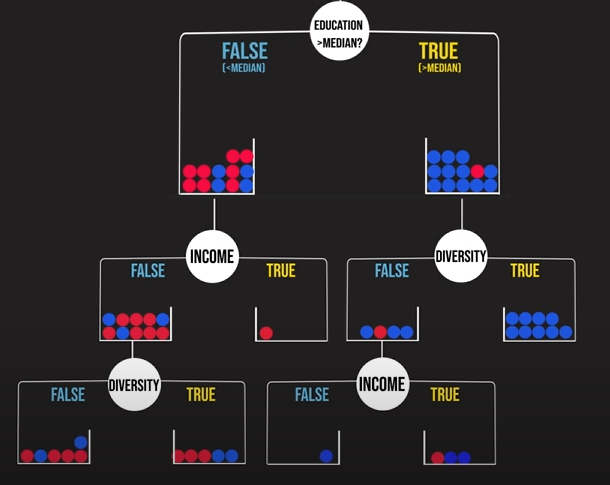

1. Overview

    - Nodes:  
        Each internal node represents a test (or decision) on an attribute (feature).
    - Branches:  
        Each branch represents the outcome of that test.
    - Leaf Nodes:  
        These represent the final decision (for classification, a class label; for regression, a continuous value).

    The idea is to split the dataset into smaller and more homogeneous subsets at each step until you reach a final decision.

2. Step-by-Step Process
    1. Data Collection & Preprocessing: 
        - Clean and Preprocess:  
        Handle missing values, encode categorical variables.
        
        - Example data:  

        | ID | Outlook  | Temperature | Play Tennis |
        |----|---------|------------|-------------|
        | 1  | Sunny   | Hot        | No          |
        | 2  | Sunny   | Hot        | No          |
        | 3  | Overcast| Hot        | Yes         |
        | 4  | Rain    | Mild       | Yes         |
        | 5  | Rain    | Cool       | Yes         |
        | 6  | Rain    | Hot        | No          |
        | 7  | Overcast| Cool       | Yes         |
        | 8  | Sunny   | Mild       | No          |

    2. Calculating the Impurity of a Node

    - Objective:  
        At each node, the algorithm selects the feature that best separates the data.

    - Criteria for Splitting:
        - Information Gain (Entropy):
            Measures the reduction in uncertainty after the split.  
            The entropy of node S is given by  
            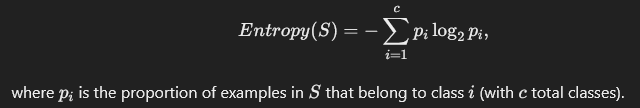
        - Example:  
            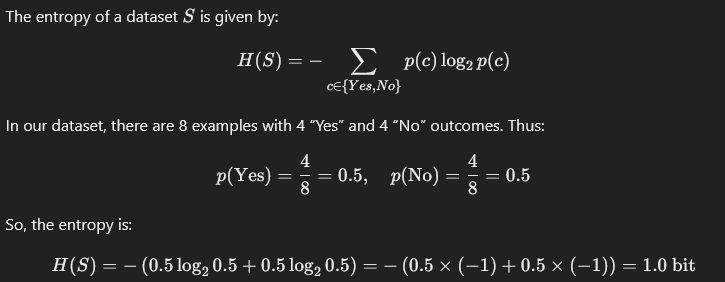
        - Gini Impurity:
            Measures how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset.(Computationally faster but less intutive)  
            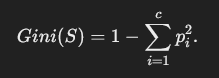  
        - Others:
            Such as variance reduction (for regression trees).  
            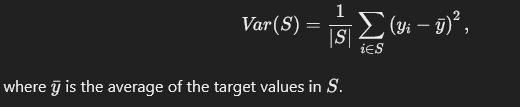


    3. Choosing the Best Feature to Split:  
        At a node with dataset S, the goal is to select a feature A and a corresponding threshold (for numerical features) or category (for categorical features) that best splits the data.

        For Classification: Information Gain

        1. Weighted Impurity After Split:
            If splitting on feature A results in subsets Sv​ for each value v (or for each interval if A is continuous), then the weighted impurity is  
            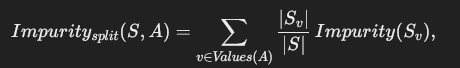
        
        2. Information Gain (using Entropy):
            The information gain when splitting on A is  
            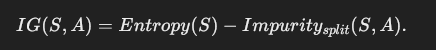

        - Example:  
            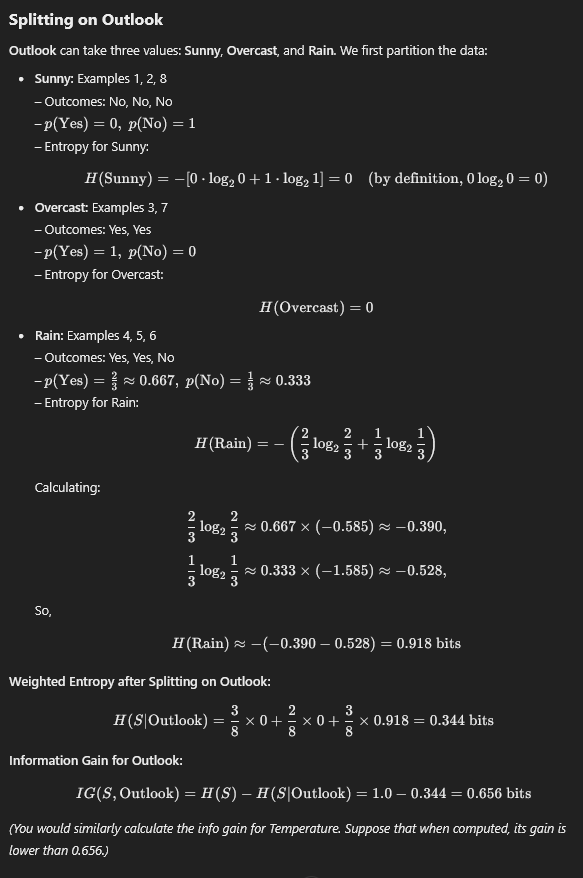  
        For Regression: Variance Reduction

        - Variance Reduction:
            When using variance as impurity, the reduction is computed as  
            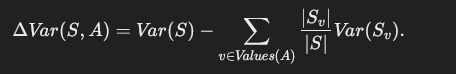

        The feature A (and its corresponding split) with the highest information gain (or highest variance reduction) is chosen.

    4. Splitting the Data

        Using the selected feature A and the optimal threshold (say t):

        For Numerical Features:  
        Split S into:  
        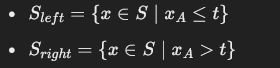

        For Categorical Features:
        Split S into subsets Sv​ for each value v of A.

        These formulas define how the dataset is partitioned based on the condition.
        - Example:  
            Since Outlook provides the highest information gain (0.656 bits), we select Outlook as the root attribute.
            So the split will be like:  
            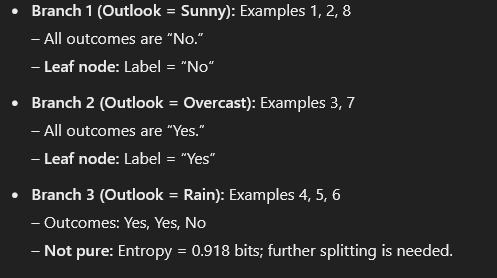  
    5. Recursive Tree Building (Recursive Partitioning)

        Repeat Steps 2–4 on each subset created by the split. The recursion stops when one of the following conditions is met:

        - Pure Node:
            All examples in S belong to the same class (for classification). That is,  
            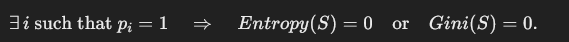  
        - Minimum Samples:
            The number of samples in SS is below a predetermined threshold. 
        - Maximum Depth:
            The tree reaches a maximum allowed depth.

        For regression trees, a similar stopping criterion might be a minimal reduction in variance or a minimum number of samples.

        - Example:  
        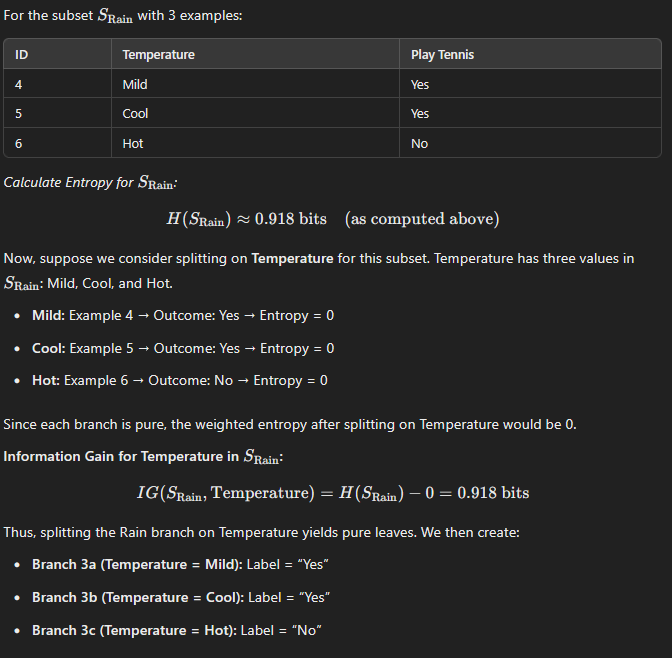

    6. Assigning the Output at the Leaf Nodes

        Once a node becomes a leaf (i.e., no further splits are performed):
        - For Classification

            Majority Vote:
            The class assigned to the leaf is the most common class in S:  
            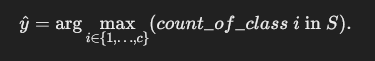

        - For Regression

            Average Value:
            The prediction is the mean of the target values in S:  
            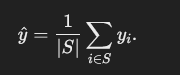
        
        - Example:  
            ```pgsql
                        ┌────────── Root: Outlook ───────────┐
                        │              │                     │
                    Sunny         Overcast                 Rain
                    (No)            (Yes)                    │
                                                ┌── Split on Temperature ──┐
                                                │             |            │
                                            Mild            Cool          Hot
                                            (Yes)           (Yes)         (No)
            ```
    7. (Optional) Pruning the Tree

        A fully grown tree may overfit the training data. Pruning helps to reduce complexity:
        - Pre-Pruning (Early Stopping)

            Set conditions such as a minimum number of samples for a split or a maximum depth dmax⁡dmax​. For instance:  
            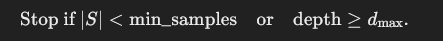  

        - Post-Pruning

            After the full tree is built, remove branches that do not provide significant improvement. A common method is cost-complexity pruning, where you minimize:  
            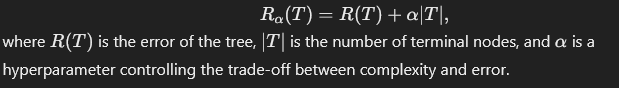

Advantages of Decision Trees ✅

- Easy to Understand & Interpret – Decision trees mirror human decision-making, making them intuitive.
- No Need for Feature Scaling – Unlike SVMs or neural networks, decision trees don't require normalization or standardization.
- Handles Categorical & Numerical Data – Works well with both types of data without complex preprocessing.
- Non-Linear Relationships – Can capture non-linear patterns in data.
- Feature Importance – Automatically selects the most important features for classification.
- Works Well with Missing Data – Can handle missing values better than many other models.
- Fast Inference – Once trained, making predictions is very efficient.

Footguns (Pitfalls) of Decision Trees 🔥🔫

- Overfitting –
    Deep trees can memorize training data, leading to poor generalization.
    Solution: Use pruning, max depth limits, or switch to Random Forests.
- Unstable to Small Changes in Data –
    A slight change in training data can lead to an entirely different tree.
    Solution: Use ensemble methods (e.g., Random Forests).
- Biased Splits (Greedy Algorithm) –
    The tree makes locally optimal decisions at each step, which may not be globally optimal.
    Solution: Consider Random Forests or Boosted Trees for better decisions.
- Computational Cost for Large Data –
    Training deep trees can be slow on big datasets.
    Solution: Use Gradient Boosting (XGBoost, LightGBM) for scalability.
- Hard to Handle XOR-like Patterns –
    If your dataset has interactions between variables that aren’t aligned with the splits, trees struggle.
    Solution: Feature engineering or tree ensembles.

When to Use Decision Trees? 🎯

✔ Small to Medium Datasets – When you need an interpretable model with fast training.  
✔ When Feature Importance Matters – Decision trees rank important features naturally.  
✔ When You Have Categorical Data – No need for one-hot encoding.  
✔ When You Want Fast Predictions – Trees are efficient at runtime.  
✔ When You Need a Rule-Based Model – Great for business rules (e.g., loan approvals, risk assessment).   


When to Avoid Decision Trees? 🚨

❌ For Large-Scale Datasets – Use Random Forest or Gradient Boosting instead.  
❌ If You Need High Accuracy – Deep learning or boosting models may perform better.  
❌ If Data is Highly Noisy – Trees can overfit; regularization is needed.  

Final Verdict

Use decision trees for quick, interpretable models, but for high accuracy, use ensembles (Random Forest, XGBoost). 🚀

### Random Forest

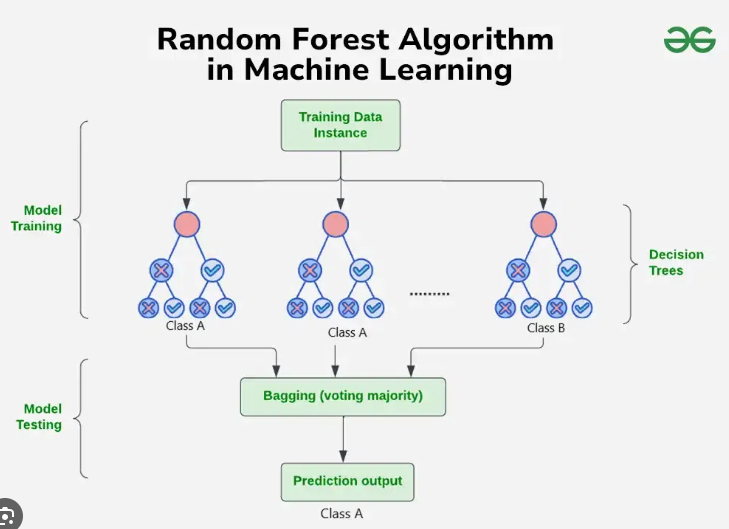

A Random Forest is a supervised machine learning algorithm that uses an ensemble of decision trees to make predictions, combining the predictions of multiple trees for improved accuracy and robustness.

Steps:
1. Data Collection & Preprocessing
    - Gather Data:
        Suppose you have a dataset D={(x1,y1),(x2,y2),…,(xN,yN)}D={(x1​,y1​),(x2​,y2​),…,(xN​,yN​)} where each xi​ is a feature vector and yi​ is the target label (classification or regression).

    - Preprocess Data:

        - Handle missing values.
        - Encode categorical variables if needed.
        - (Optionally) Normalize or standardize numerical features.
2. Bootstrapping (Bagging)
    Random Forest builds multiple decision trees on different bootstrapped samples.
    - Bootstrap Sample: For each tree, sample N examples with replacement from D to form a training set D<sub>i</sub>​.
    - Mathematical Note:  
        Because sampling is with replacement, approximately 63.2% of the original data appears in each bootstrap sample.
3. Building Individual Decision Trees with Feature Subspacing

    For each bootstrapped sample, a decision tree is built—but with one twist:

    - Random Feature Selection at Splits:  
    When considering a split at a node, instead of using all p features, only a random subset of m features is chosen. For classification tasks, a common choice is:   
    For Regression, often: m=p/3

    - Building the Tree:  
        Each tree is grown (often fully) using a standard algorithm (like CART). At each node, the algorithm selects the best split based only on the randomly chosen m features.

        For example, if at a node the best split among the m features minimizes the impurity (e.g., Gini index for classification), then that split is use

    - Gini Impurity (Classification Example):
        For a node t with K classes:  
        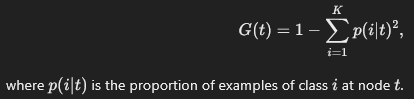
4. Aggregating Predictions (Voting or Averaging)

    Once all trees are built, the Random Forest makes a prediction by combining the outputs of the individual trees:

    - For Classification:
        Use majority voting:  
        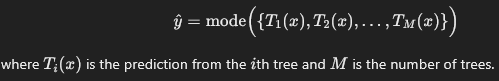  
    - For Regression:
        Use averaging:  
        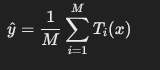
5. Out-of-Bag (OOB) Estimation

    Since each tree is built on a bootstrap sample, roughly 36.8% of the data is left out (not sampled) for that tree. These are called Out-of-Bag (OOB) samples.  
    Out-of-Bag (OOB) estimation is an internal cross-validation method used in Random Forests to estimate the generalization error without needing a separate validation set.

    - OOB Prediction:  
        For each example, average the predictions from trees in which tree that example was not included.
    - OOB Error:  
        Use the OOB predictions to estimate the generalization error without needing a separate validation set.  
        Lets say for example if there are total 3 sample and 2 of them are wrong because of OOB.  
        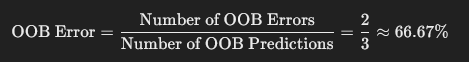  
    
    - If the OOB error is low, your model is likely generalizing well.
    - If the OOB error is high, your model might be underfitting or overfitting.

    - Example Usage:  
    Let's say your Random Forest has an OOB error of 5%. This suggests that on unseen data, your model is expected to misclassify around 5% of the samples.


Advantages & When to Use Random Forests
Advantages

-  Accuracy & Robustness:
    By aggregating many decision trees, Random Forest reduces overfitting compared to a single decision tree.

- Handles High Dimensionality:
    The random subspace method helps in dealing with many features.

-  for Both Classification and Regression:
    With voting for classification and averaging for regression.

- Resistant to Noise:
    Bootstrapping and feature randomness help smooth out noise.

- Built-In Estimation of Generalization Error:
    Through Out-of-Bag estimation.

Footguns (Potential Pitfalls)

- Computational Cost:
    Building many trees can be resource-intensive for very large datasets.

- Less Interpretability:
    The ensemble is a “black box” compared to a single decision tree.

- Parameter Tuning Required:
    You may need to tune the number of trees, depth, and number of features considered per split.

When to Use Random Forests

- Large Datasets:
    When you have enough data to build robust trees without overfitting.

- High-Dimensional Feature Spaces:
    When many features exist, the random subspace approach helps reduce correlation among trees.

- Need for Accuracy Over Interpretability:
    When prediction performance is key and a slightly less interpretable model is acceptable.

- Ensemble Methods Preferred:
    When a voting or averaging mechanism is needed to smooth predictions and reduce variance.

### Naive Bayes

Naive Bayes is a probabilistic classifier based on Bayes’ Theorem with a “naive” assumption that features are conditionally independent given the class label. Despite its simplicity, it works surprisingly well in many applications, especially in text classification (e.g., spam filtering).

1. Bayes’ Theorem

    At the heart of Naive Bayes is Bayes’ Theorem, which states:  
    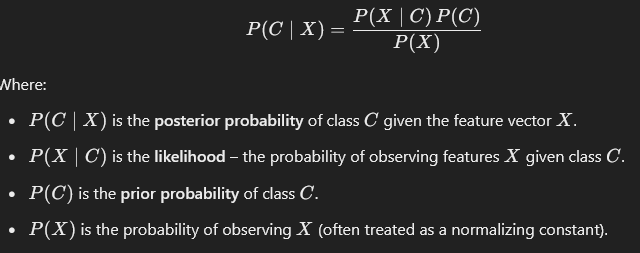   
    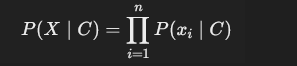   
    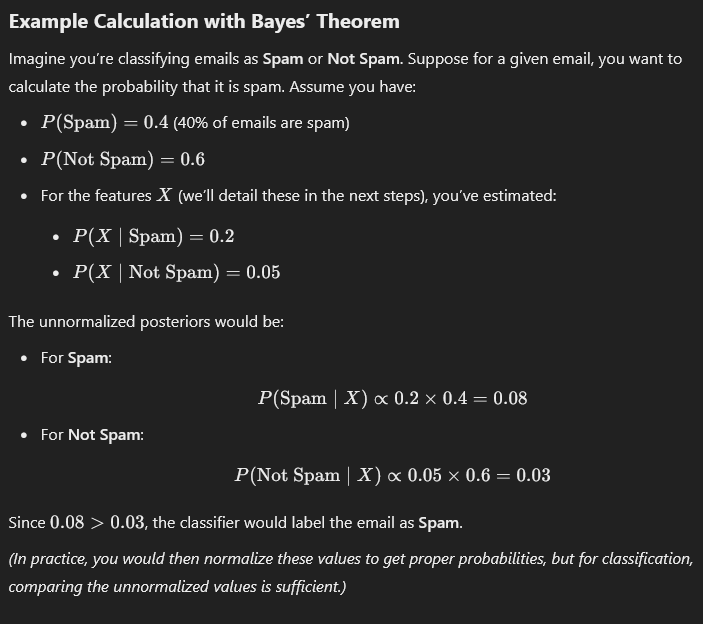
     
2. The "Naive" Assumption: Conditional Independence
    If the feature vector X has n features, i.e.  
    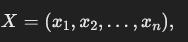  
    Naive Bayes assumes that all features are independent of each other given the class.  The probability of all features occurring together is multiplication of  The probability of each individual feature given the class.
    the conditional independence assumption allows us to write:  
    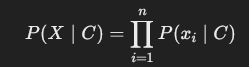  
    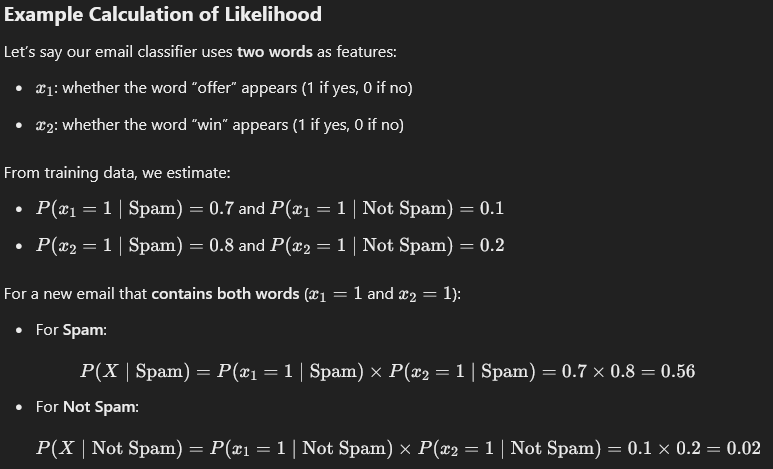  
3. Putting It All Together: Classifying an Email  
    combine the prior and the likelihood to compute the unnormalized posterior probability for each class using Bayes’ Theorem.
    1. Calculate Priors  
        Assume from your training data:  
        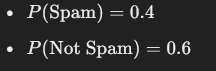
    2. Calculate Likelihoods  
        As computed above for an email with both “offer” and “win”:  
        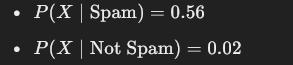
    3. Compute the Unnormalized Posterior for Each Class
        - For Spam:  
            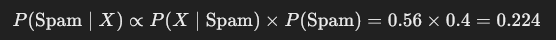
        - For Not Spam:  
            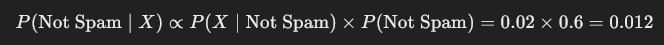  
        Since 0.224>0.012, we classify the email as Spam.
5. Advantages and Disadvantages  
    Advantages:

    - Simplicity: Easy to implement and understand.
    - Speed: Very fast to train and predict, even on large datasets.
    - Works Well with High-Dimensional Data: Especially effective in text classification tasks.
    - Low Data Requirements: Can perform well even with relatively little training data.

    Disadvantages

    - Conditional Independence Assumption: In reality, features are often correlated. This assumption might lead to less accurate probability estimates.
    - Zero-Frequency Problem: If a feature value never appears in the training set for a class, its probability becomes zero. This is typically solved using Laplace smoothing.
    - Equal Weighting of Features: All features are treated equally, which might not be optimal if some features are more informative than others.

6. When to Use Naive Bayes

- Text Classification: Such as spam detection, sentiment analysis, or document categorization.
- Real-Time Predictions: Its computational efficiency makes it suitable for applications where speed is critical.
- Baseline Models: A good starting point to compare with more complex algorithms.
- High-Dimensional Data: Particularly useful when the number of features is large compared to the number of samples (e.g., word counts in documents).

## 5. Model Selection & Implementation

We will implement several classification algorithms. For demonstration, we use Logistic Regression, SVM, KNN, Decision Tree, Random Forest, and Naive Bayes.

We first split the dataset into training and testing sets.




In [34]:

from sklearn.model_selection import train_test_split

# Use all four original features for modeling
X = df[feature_cols]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (74, 4)
Test set shape: (75, 4)


In [35]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=20),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

# Train each model and print accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("---------------------------------------------")

# Ensemble method: Voting Classifier
voting_clf = VotingClassifier(estimators=list(models.items()), voting='soft')
voting_clf.fit(X_train, y_train)
y_pred_ensemble = voting_clf.predict(X_test)
acc_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"Voting Classifier Accuracy: {acc_ensemble:.4f}")
print(classification_report(y_test, y_pred_ensemble))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ensemble))

Logistic Regression Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        22

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

Confusion Matrix:
 [[29  0  0]
 [ 0 24  0]
 [ 0  0 22]]
---------------------------------------------
SVM Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        22

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

Confusion Matrix:
 [[29  0  0]
 [ 0 24  0]
 [ 0  0 22]]
----------------------

## 6. Model Evaluation

We evaluate our models using accuracy, precision, recall, F1-score and confusion matrices (see above in the model loop).  
`We will discuss this later in detail`

## 7. Hyperparameter Tuning & Optimization
Grid Search with Cross-Validation (Grid Search CV) is a technique used in machine learning to tune hyperparameters and find the best model configuration. It systematically searches through a specified set of hyperparameter values to optimize model performance.
We use Grid Search to optimize the Random Forest model parameters as an example.  
Some params:  
- n_estimators → Number of trees in the forest.
- max_depth → Maximum depth of each tree.
- min_samples_split → Minimum number of samples required to split a node.
- min_samples_leaf → Minimum number of samples required in a leaf node.
- max_features → Number of features to consider when looking for the best split.

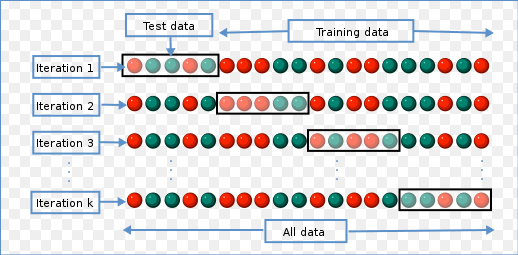   


In [ ]:
# Step 1: Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 5, 10]       # Maximum depth of each tree
}

# Step 4: Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Step 5: Perform Grid Search with Cross-Validation
# - cv=5 means 5-fold cross-validation
# - scoring='accuracy' evaluates based on accuracy
# - n_jobs=-1 enables parallel processing for speedup
grid_rf = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Step 6: Fit the GridSearchCV model to the training data
grid_rf.fit(X_train, y_train)

# Step 7: Display the best hyperparameters found
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best Cross-Validation Score:", grid_rf.best_score_)

# Step 8: Evaluate the tuned model on the test set
best_rf = grid_rf.best_estimator_  # Retrieve the best model

y_pred_best = best_rf.predict(X_test)  # Predict on test data

# Step 9: Print evaluation metrics
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

Best parameters for Random Forest: {'max_depth': 5, 'n_estimators': 50}
Best CV Score: 0.9523809523809523
Tuned Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## 8. Advanced Topics (Optional)

### a. Dimensionality Reduction with t-SNE

We apply t-SNE to visualize the dataset in 2D.

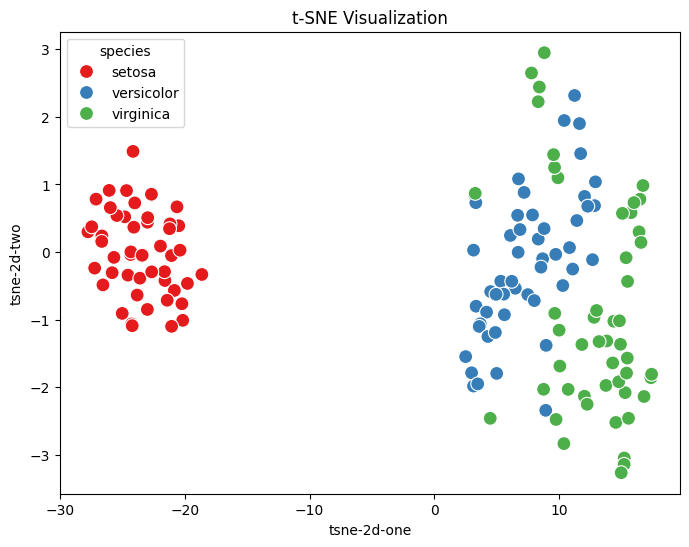

In [15]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X)

df['tsne-2d-one'] = tsne_result[:,0]
df['tsne-2d-two'] = tsne_result[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(x='tsne-2d-one', y='tsne-2d-two', hue='species', data=df, palette='Set1', s=100)
plt.title('t-SNE Visualization')
plt.show()

### b. Model Deployment (Saving and Loading Models)

We save our best model and then load it to make a prediction on new data.

In [17]:
import pickle

# Save the tuned Random Forest model
with open('best_rf_model.pkl', 'wb') as f:
    pickle.dump(best_rf, f)

# Load the model and make a prediction
with open('best_rf_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)



array([[ 0.31099753, -0.59237301,  0.53540856,  0.00087755]])

In [31]:
# Predict on a sample (using first row of X_test as an example)
sample = np.array(X_test.iloc[3]).reshape(1, -1)

print("Prediction for sample:", loaded_model.predict(sample))

Prediction for sample: [1]


/home/shazad/Project2025/2.Irisflower/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## 9. Project Documentation & Reproducibility

Ensure that all code, analysis, and findings are clearly documented. Use markdown cells to explain each step, include visualizations with titles and descriptions, and maintain a reproducible workflow. This notebook itself is an example of complete documentation.

## Conclusion

This notebook demonstrated a complete pipeline for Iris flower classification:

- **Data Acquisition & Understanding**: Loading and examining the dataset
- **Data Preprocessing**: Cleaning, scaling, and encoding data
- **EDA**: Performing univariate, bivariate, and multivariate analyses
- **Feature Engineering**: Creating new features and selecting informative ones
- **Model Implementation**: Training multiple models and evaluating them
- **Hyperparameter Tuning**: Optimizing model parameters using Grid Search
- **Advanced Topics**: Visualizing with t-SNE and saving/loading models for deployment
- **Documentation & Reproducibility**: Clear explanation and documentation at every step

